In [1]:
# numpy để xử lý vector
# matplotlib.pyplot để vẽ đồ thị
# numpy.fft để tính toán biến đổi Fourier nhanh (FFT)
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

In [2]:
# Tần suất lấy mẫu 4 lần / giây (4 Hz)
fs = 4
# Thời gian lấy mẫu 10 giây
total_time = 10
# Chu kì lấy mẫu 1 / fs
Ts = 1.0 / fs
# Tổng số lượng mẫu
N = int(total_time * fs)
# Thời điểm lấy mẫu: 0, Ts, 2Ts, 3Ts, ..., (N-1)Ts
t = np.arange(N)*Ts

# Direct Component với cường độ bằng 5 (giống dòng điện 1 chiều, không có dao động)
dc = 5*np.ones(N)
# Thành phần sóng âm có tần số 1Hz, lệch pha 90 độ, cường độ bằng 2
comp1hz = 2*np.cos(2*np.pi*t-np.pi/2)
# Thành phần sóng âm có tần số 2Hz, lệch pha 0 độ, cường độ bằng 3
comp2hz = 3*np.cos(4*np.pi*t)

# Tín hiệu thu nhận được = tổng 3 tín hiệu
x = dc + comp1hz + comp2hz

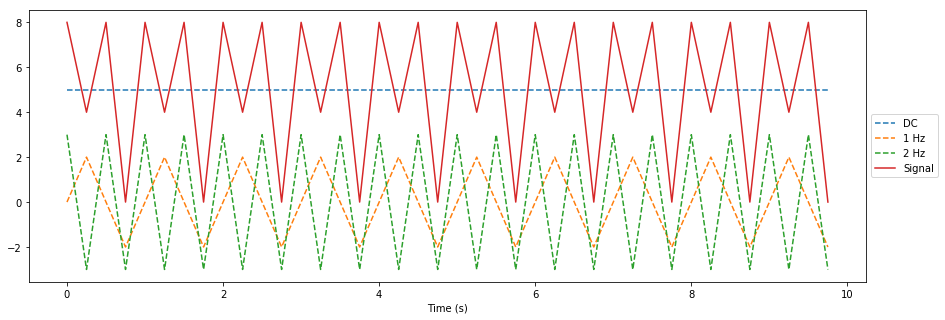

In [3]:
# Vẽ các tín hiệu thành phần
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.plot(t, dc, '--', label='DC')
ax.plot(t, comp1hz, '--', label='1 Hz')
ax.plot(t, comp2hz, '--', label='2 Hz')
# Vẽ tín hiệu
ax.plot(t, x, '-', label='Signal')

ax.set_xlabel('Time (s)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

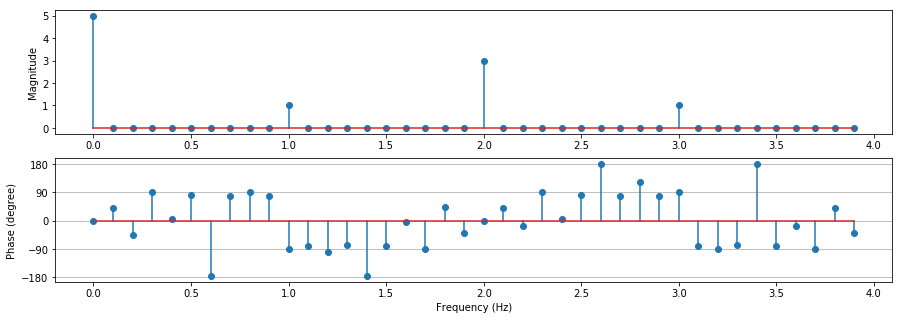

In [4]:
# có tín hiệu x[0]...x[N-1]
# tìm các tần số và pha của các tín hiệu tuần hoàn tạo nên x
# sử dụng gói numpy.fft

def runFFT(x):
    X = fft(x)
    Xabs = np.abs(X)
    Xangle = np.angle(X)
    return X, Xabs, Xangle

X, Xabs, Xangle = runFFT(x)
N = X.shape[0]

# divide by N (per inverse Fourier Transform)
magnitude = Xabs / N

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(211)
ax.stem(np.arange(N)/N*fs, magnitude)
ax.set_ylabel('Magnitude')

ax = plt.subplot(212)
ax.stem(np.arange(N)/N*fs, Xangle*180.0/np.pi)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (degree)')
plt.yticks([-180, -90, 0, 90, 180])
plt.grid(True, axis='y', linestyle='-')

plt.show()

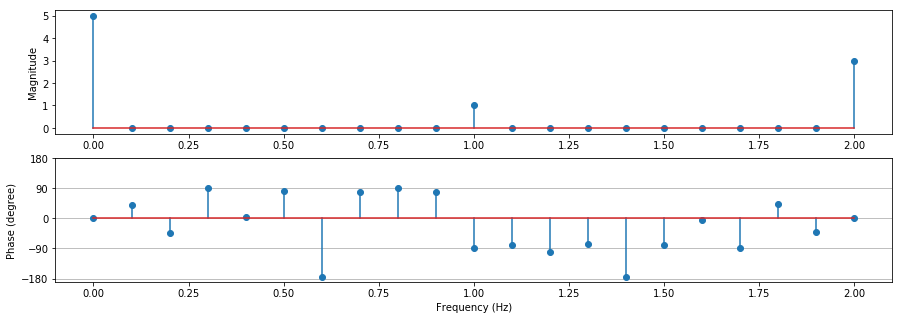

In [5]:
# Khi tín hiệu x là số thực, thường chỉ vẽ một nửa số hệ số X do nửa kia là đối xứng (conjugate)
X, Xabs, Xangle = runFFT(x)
N = X.shape[0]
M = N // 2 + 1
X, Xabs, Xangle = X[:M], Xabs[:M], Xangle[:M]

# divide by N (per inverse Fourier Transform)
magnitude = Xabs / N

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(211)
ax.stem(np.arange(M)/N*fs, magnitude)
ax.set_ylabel('Magnitude')

ax = plt.subplot(212)
ax.stem(np.arange(M)/N*fs, Xangle*180.0/np.pi)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Phase (degree)')
plt.yticks([-180, -90, 0, 90, 180])
plt.grid(True, axis='y', linestyle='-')

plt.show()

In [ ]:
# Thử nghe tín hiệu âm thanh thực (tiếng chim hót)
from IPython.display import Audio
Audio('data/nightingale.wav')

In [ ]:
# Tạo ra nốt La chuẩn với trường độ = 1 giây
fs = 44100
Ts = 1.0/fs
N = int(2*fs)
A = 1.0
f = 440 # Tần số của nốt La

t = np.arange(N)*Ts
x = A * np.cos(2*np.pi*f*t)
Audio(data=x, rate=fs)

In [ ]:
# Chơi gam Đô trưởng (các nốt Đồ, Rê, Mi, Fa, Son, La, Xi, Đô)
fall = [261.63, 293.66, 329.63, 349.23, 392.00, 440.00, 493.88, 523.25]
fs = 44100
Ts = 1.0/fs
N = int(1*fs)
A = 1.0

xall = []
for f in fall:
    t = np.arange(N)*Ts
    x = A * np.cos(2*np.pi*f*t)
    xall.append(x) # ghép các nốt nhạc
x = np.hstack(xall)
Audio(data=x, rate=fs)